In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df_user = pd.read_csv('3_logs.csv')

In [45]:
df_logs = pd.read_csv('3_user_data.csv')

In [46]:
df = df_user.merge(df_logs, on='client')

In [47]:
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [48]:
df_logs

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [49]:
df.agg({'platform': pd.Series.nunique})
#Способ узнать, сколько принимает колонка уникальных значений из датафрейма
#Обращаемся к колонке через способ агрегации agg
#обращаемся по ключу, platform - колонка
#применяем метод считывания униальности pd.Series.nunique

platform    3
dtype: int64

In [50]:
df_client = df.query('success == True') \
.groupby(['client'], as_index=False) \
.agg({'success': 'count'}) \
.sort_values('success', ascending=False)
#создаём переменную, обращаемся по ключу query == True
#Группируем с помощью groupby по клиентамб выставляя as_index для корректного отображения
#агрегируем(считываем) колонку client по пораметру count методом count
#сортируем данные в колонке success и выставляем ascending=False от большего к меньшему

In [51]:
df_client.head(10)

,client,success
250,12179,41
737,36165,41
588,28719,41
1280,61473,41
1279,61468,41
1933,92584,41
1716,82563,41
1084,52870,41
1636,78349,41
1333,64064,40


In [52]:
df_platform_1 = df.query('success == True')\
.groupby(['platform'], as_index=False)\
.agg({'success': 'count'})\
.sort_values('success', ascending=False)
#узнаём сколько success пользуется platform тем же методом что и выше.

In [53]:
df_platform_1

,platform,success
1,phone,1565
0,computer,843
2,tablet,139


In [54]:
df_logs1 = df.merge(df_logs, on='premium', how='inner')
#ОбЪеденяем два датафрейма в один с помощью mergпе - где первый просто df
#Добавляем второй датафрейм в скобки, первым аргументом df_logs, по которому он будет объеденён.
#выставляем по колонке "premium"
#inner - обЪединяет показатели по входящим осям в premium

In [56]:
df_logs1

,client_x,success,platform,time,premium,age_x,client_y,age_y
0,61468,True,phone,1585425658,False,25,46346,58
1,61468,True,phone,1585425658,False,25,4391,55
2,61468,True,phone,1585425658,False,25,27372,64
3,61468,True,phone,1585425658,False,25,11989,44
4,61468,True,phone,1585425658,False,25,60664,49
...,...,...,...,...,...,...,...,...
7862927,72908,True,phone,1585416689,True,66,52373,36
7862928,72908,True,phone,1585416689,True,66,13688,66
7862929,72908,True,phone,1585416689,True,66,40643,22
7862930,72908,True,phone,1585416689,True,66,53774,50


In [57]:
df_platform_2 = df.query('premium == True') \
.groupby(['platform'], as_index=False) \
.agg({'premium': 'count'}) \
.sort_values('premium', ascending=False)
#узнаём сколько premium клиентов пользуется platform тем же методом что и выше.

In [58]:
df_platform_2

,platform,premium
1,phone,246
0,computer,150
2,tablet,24


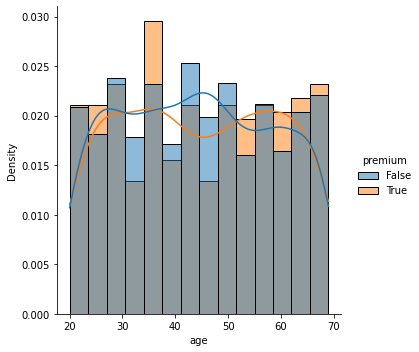

In [59]:
sns.displot(data=df_logs, x='age', hue='premium', kde=True, kind="hist", stat='density',
           common_norm=False, bins=14)
#Создаём график displot через функцию вызова sns.displot
#Указываем путь к фалуБ по которому нужно построить график data=df_logs.
#задаём ось X и Y где Y- колонка premium. X - колонка age.
#задаём параметр KDE=False или True, что бы включить или выключить линию
# Задаём параметр kind='hist' это гистограмма.

In [68]:
success_count = df.loc[df.success == True].client.value_counts()
#создаём новую переменную для построения будущего графика success_count
#прописываем путь df
#вызываем датафрейм через функцию .loc
#в контейнере обращаемся к датафрейму df и колонке success
# ставим успешное завершение заказов в контейнере по отношению к success == True
#указываем колонкуБ по которой мы будем сравнивать сделки клиентов
#value_counts возвращает результат сортировки ы порядке убывания

In [73]:
success_count = success_count.rename('successes')
# переименовываем колонку в более удобную для насБ с помощью функции .rename

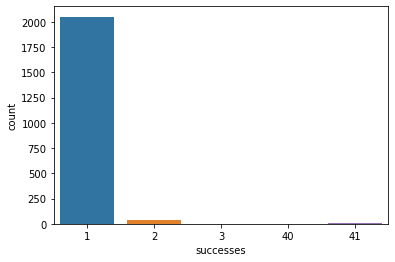

In [74]:
sns.countplot(x=success_count)
#Строим график countplot, где задаём ось Х - это наша переменная success_count
#Ось Y - не требуется, так как countplot сам подсчитывает её результат.

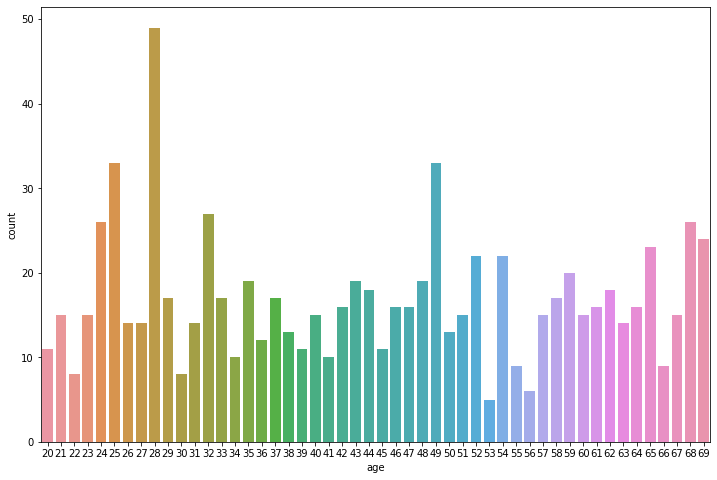

In [78]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df.loc[(df.platform =='computer') 
                                     &(df.success==True)],
            x='age')
#Вызываем countplot 
#Сразу ставим расширение таблицы через figsize
#вызываем сам countplot через sns.countplot
#Обозначаем что нам нужны значения из кортежа data=df
#вызываем датафрейм через функцию .loc
#Обозначем, что обращаемся в датафрейме к спискам, где в кортеже platform нам нужен параметр computer
# так же в списке обозначем что нам нужен кортеж с параметром success == True(завершённые)
#И обозначаем ось Х, по которой будет строиться график
#Ось Y - не нужна, ввиду того, что countplot сам вычисляет нужные значения.